<a href="https://colab.research.google.com/github/svanlinden/test/blob/master/iris_opl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Irisbloemen dataset
------------------------

a) Laad de dataset **iris** die beschikbaar is de <a href="https://scikit-learn.org/stable/datasets/index.html">SciKit Learn Datasets</a> en bestudeer de inhoud. Maak er een pandas DataFrame van en bestudeer deze.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(np.column_stack([iris.data, iris.target]), columns=[*iris.feature_names,'species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


b) Wat voor soort voorspelling proberen we hier te doen? Regressie of classificatie?

In [ ]:
# Een Classificatie

c) Bepaal welke gegevens we niet kunnen gebruiken bij deze voorspelling?

In [ ]:
# De gegevens over de species, want dit is onze target. Dit willen voorspellen o.b.v. de overige kenmerken.

d) Maak nu een input trainingset (X_train,y_train) en testset (X_test,y_test), zodat de testset bestaat uit 20% willekeurig gesamplede voorbeelden. Tip: gebruik hiervoor <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> van SciKit Learn.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

e) Pas de targetkolom y_train, en y_test aan, zodat elk type iris een one-hot geëncodeerd wordt. Tip: gebruik de <a href="https://keras.io/api/utils/python_utils/#to_categorical-function">to_categorical-functie</a> van Keras.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:4]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

f) Maak een neuraal netwerk met de correcte inputs en outputs. Voeg een laag toe die de **normalisatie** van de input voor zijn rekening neemt.  Denk ook goed na over welke activatiefuncties je nodig zal hebben. Voor een classificatie zijn niet alle activatiefuncties zijn gepast.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 11,091
Trainable params: 11,083
Non-trainable params: 8
_______________________________________________________

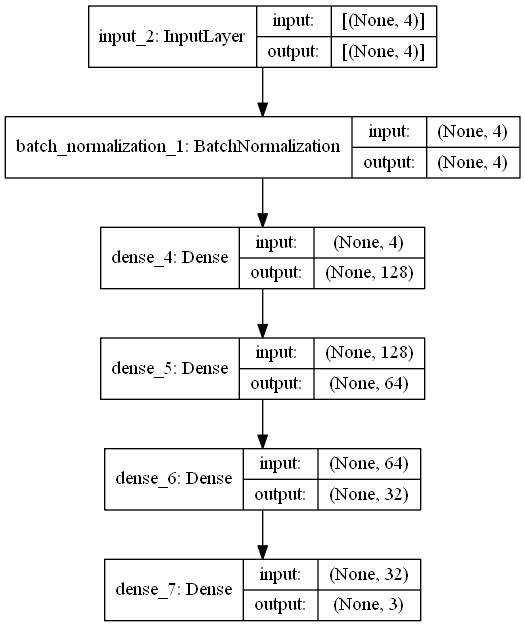

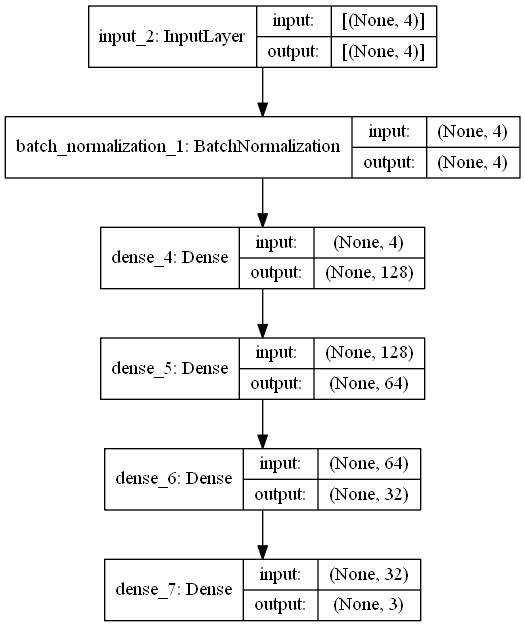

In [ ]:
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

inputs = Input(shape=(4,))
x = BatchNormalization()(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()
keras.utils.plot_model(model,to_file='../images/oefening3.png', show_shapes=True)
Image('../images/oefening3.png')

g) Compileer je model.
    a. Welke kostenfunctie (loss) zal je hier gebruiken. Zoek eventueel de beschikbare kostenfunctie op.
    b. Welke optimizer(s) ga je gebruiken? Zoek eventueel op welke de beschikbare zijn en experimenteer.
    c. Welke metric ga je gebruiken?

In [ ]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.categorical_accuracy
)

h) Train je neuraal netwerk met early stopping en bekijk via “PlotLossesKeras” de resultaten.
* Hoeveel epochs ga je gebruiken. Experimenteer hiermee.
* Welke batch size? Idem
* Experimenteer ook met de patience van de Early Stopping en de grootte van de validation split.

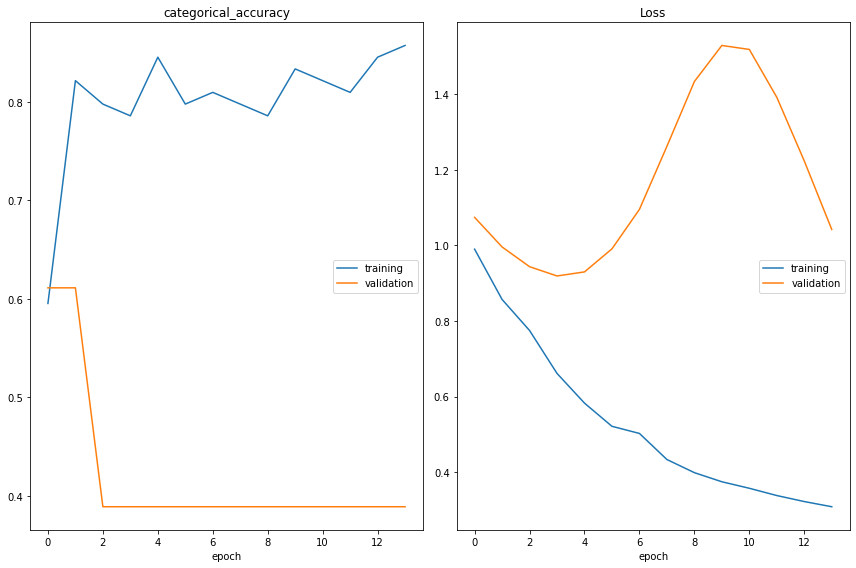

categorical_accuracy
	training         	 (min:    0.595, max:    0.857, cur:    0.857)
	validation       	 (min:    0.389, max:    0.611, cur:    0.389)
Loss
	training         	 (min:    0.309, max:    0.990, cur:    0.309)
	validation       	 (min:    0.919, max:    1.529, cur:    1.042)


In [ ]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train,
                    batch_size=20, # gelijk aan grootte van deze kleine dataset is goed
                    epochs=100,  # vanaf 5000 wordt het resultaat redelijk goed, je kan blijven bijtrainen
                    validation_split=0.3,
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience=10),
                        PlotLossesKeras()],
                    verbose=False)

i) Evalueer je neuraal netwerk m.b.v. de <code>evaluate</code>-methode op je testset (X_test, y_test).
* Welke loss en nauwkeurigheid behaal je?
* Is dit goed?

In [ ]:
model.evaluate(X_test,y_test)
# zeer goed resultaat accuracy is 100%

1/1 [==============================] - 0s 27ms/step - loss: 1.2541 - categorical_accuracy: 0.3667


[1.2541472911834717, 0.36666667461395264]

j) Verifieer de kwaliteit van je model a.d.h.v. enkele evaluatiemetrieken.
* Gebruik de <code>predict</code>-methode om voorspellingen te maken en bij de output.
* Zet de voorspellingen van One-Hot encoded vectors om naar normale waarde met de <code>np.argmax</code>-functie
* Gebruik de <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.html">verschillende metrics</a> uit SciKit Learn, zoals <code>confusion_matrix</code>, <code>precision_score</code>, <code>recall_score</code> en <code>f1_score</code>
* Wat besluit je?

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_ohe = model.predict(X_test)
y_pred = np.argmax(y_pred_ohe, axis=1)
y_true = np.argmax(y_test, axis=1)

print(precision_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None))
print(f1_score(y_true, y_pred, average=None))
print(confusion_matrix(y_true,y_pred))

# Over heel de lijn perfecte scores



[0.   0.   0.55]
[0. 0. 1.]
[0.         0.         0.70967742]
[[ 0 10  0]
 [ 0  0  9]
 [ 0  0 11]]


c:\users\deketelw\appdata\local\programs\python\data-science-2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
